In [1]:
### PRÉ-PROCESSAMENTO E ANÁLISE DE DADOS ###

# Após o estudo das variáveis que compunham o dataset original, algumas variáveis de interesse foram
# selecionadas para compor esta investigação. São elas: 

# churn: Instance of churn between 31-60 days after observation date
# rev_Mean: Mean monthly revenue (charge amount)
# mou_Mean: Mean number of monthly minutes of use
# totmrc_Mean: Mean total monthly recurring charge
# ovrmou_Mean: Mean overage minutes of use
# ovrrev_Mean: Mean overage revenue
# roam_Mean: Mean number of roaming calls
# change_mou: Percentage change in monthly minutes of use vs previous three month average
# change_rev: Percentage change in monthly revenue vs previous three month average
# custcare_Mean: Mean number of customer care calls
# ccrndmou_Mean: Mean rounded minutes of use of customer care calls
# attempt_Mean: Mean number of attempted calls
# complete_Mean: Mean number of completed calls
# months: Total number of months in service
# actvsubs: Number of active subscribers in household
# asl_flag: Account spending limit
# totcalls: Total number of calls over the life of the customer
# totmou: Total minutes of use over the life of the customer
# totrev: Total revenue
# adjrev: Billing adjusted total revenue over the life of the customer
# adjmou: Billing adjusted total minutes of use over the life of the customer
# adjqty: Billing adjusted total number of calls over the life of the customer
# avgrev: Average monthly revenue over the life of the customer
# avgmou: Average monthly minutes of use over the life of the customer
# avgqty: Average monthly number of calls over the life of the customer
# avg3mou: Average monthly minutes of use over the previous three months
# avg3qty: Average monthly number of calls over the previous three months
# avg3rev: Average monthly revenue over the previous three months
# avg6mou: Average monthly minutes of use over the previous six months
# avg6qty: Average monthly number of calls over the previous six months
# avg6rev: Average monthly revenue over the previous six months
# area: Geographic area
# adults: Number of adults in household
# eqpdays: Number of days (age) of current equipment

In [ ]:
# Importar as bibliotecas necessárias
import pandas as pd

# Carregamento do arquivo
arquivo = 'churn_challenge_data2.csv'
dataset = pd.read_csv(arquivo, sep=',' ,header=0)

In [7]:
# Visualização exploratória dos dados
dataset.head();

,churn,actvsubs,adjmou,adjqty,adjrev,adults,area,asl_flag,attempt_Mean,avg3mou,...,months,mou_Mean,ovrmou_Mean,ovrrev_Mean,rev_Mean,roam_Mean,totcalls,totmou,totmrc_Mean,totrev
0,1,1,4085.00,1602,1453.44,1.0,NORTHWEST/ROCKY MOUNTAIN AREA,N,52.333333,272,...,61,219.25,0.00,0.0,23.9975,0.0,1652,4228.00000,22.500,1504.62
1,0,1,26367.00,14624,2833.88,1.0,CHICAGO AREA,N,263.333333,305,...,56,482.75,22.75,9.1,57.4925,0.0,14654,26400.00000,37.425,2851.68
2,1,1,24303.05,7888,1934.47,2.0,GREAT LAKES AREA,N,9.000000,12,...,58,10.25,0.00,0.0,16.9900,0.0,7903,24385.05333,16.990,2155.91
3,0,1,3035.00,1479,1941.81,4.0,CHICAGO AREA,N,3.666667,8,...,60,7.50,0.00,0.0,38.0000,0.0,1502,3065.00000,38.000,2000.90
4,0,1,13965.00,4452,2166.48,1.0,NEW ENGLAND AREA,N,222.333333,558,...,57,570.50,0.00,0.0,55.2300,0.0,4485,14028.00000,71.980,2181.12


In [8]:
# Verificando os tipos de dados
dataset.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 34 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   churn          100000 non-null  int64  
 1   actvsubs       100000 non-null  int64  
 2   adjmou         100000 non-null  float64
 3   adjqty         100000 non-null  int64  
 4   adjrev         100000 non-null  float64
 5   adults         76981 non-null   float64
 6   area           99960 non-null   object 
 7   asl_flag       100000 non-null  object 
 8   attempt_Mean   100000 non-null  float64
 9   avg3mou        100000 non-null  int64  
 10  avg3qty        100000 non-null  int64  
 11  avg3rev        100000 non-null  int64  
 12  avg6mou        97161 non-null   float64
 13  avg6qty        97161 non-null   float64
 14  avg6rev        97161 non-null   float64
 15  avgmou         100000 non-null  float64
 16  avgqty         100000 non-null  float64
 17  avgrev         100000 non-null

In [10]:
# Limpeza dos dados

## Verificando colunas com valores nulos - O dataset será processado de acordo com as hipóteses a serem testadas
dataset.isnull().sum()

churn                0
actvsubs             0
adjmou               0
adjqty               0
adjrev               0
adults           23019
area                40
asl_flag             0
attempt_Mean         0
avg3mou              0
avg3qty              0
avg3rev              0
avg6mou           2839
avg6qty           2839
avg6rev           2839
avgmou               0
avgqty               0
avgrev               0
ccrndmou_Mean        0
change_mou         891
change_rev         891
complete_Mean        0
custcare_Mean        0
eqpdays              1
months               0
mou_Mean           357
ovrmou_Mean        357
ovrrev_Mean        357
rev_Mean           357
roam_Mean          357
totcalls             0
totmou               0
totmrc_Mean        357
totrev               0
dtype: int64

In [11]:
## Verificando a presença de linhas duplicadas

print(any(dataset.duplicated()))

## Deletando as linhas duplicadas - retirar o # caso o resultado do comando anterior seja 'true'
## dataset = dataset.drop_duplicates()

False


In [13]:
## Deletando linhas de valores nulos
dataset1 = dataset.dropna(axis=0, how='all')
dataset1.isnull().sum()

churn                0
actvsubs             0
adjmou               0
adjqty               0
adjrev               0
adults           23019
area                40
asl_flag             0
attempt_Mean         0
avg3mou              0
avg3qty              0
avg3rev              0
avg6mou           2839
avg6qty           2839
avg6rev           2839
avgmou               0
avgqty               0
avgrev               0
ccrndmou_Mean        0
change_mou         891
change_rev         891
complete_Mean        0
custcare_Mean        0
eqpdays              1
months               0
mou_Mean           357
ovrmou_Mean        357
ovrrev_Mean        357
rev_Mean           357
roam_Mean          357
totcalls             0
totmou               0
totmrc_Mean        357
totrev               0
dtype: int64

In [14]:
## Salvando o dataframe geral

dataset1.to_csv('dataset1.csv', index = False);

In [16]:
# Hipótese 1 - Diferentes regiões de cobertura apresentam "churns" distintos
## O comportamento do consumidor pode variar de região para região.
## Sendo assim, uma análise mais local pode se mostrar mais efetiva na descoberta de insights que podem
## auxiliar a compreender os motivos pelos quais um usuário não deseja mais os serviços da empresa.
## O objetivo do raciocínio a seguir é verificar se a ocorrência de "churns" ocorre de maneira homogênea
## entre as regiões atendidas pela empresa.


## Deletando valores nulos - retirar o # caso haja valores nulos nas colunas de interesse
dataset2 = dataset1.dropna(subset=['area'], axis=0, how='any')
dataset2.isnull().sum()

churn                0
actvsubs             0
adjmou               0
adjqty               0
adjrev               0
adults           23011
area                 0
asl_flag             0
attempt_Mean         0
avg3mou              0
avg3qty              0
avg3rev              0
avg6mou           2837
avg6qty           2837
avg6rev           2837
avgmou               0
avgqty               0
avgrev               0
ccrndmou_Mean        0
change_mou         891
change_rev         891
complete_Mean        0
custcare_Mean        0
eqpdays              1
months               0
mou_Mean           357
ovrmou_Mean        357
ovrrev_Mean        357
rev_Mean           357
roam_Mean          357
totcalls             0
totmou               0
totmrc_Mean        357
totrev               0
dtype: int64

In [17]:
## Agrupando áreas por região

import numpy as np

region = []
for row in dataset2['area']:
        if row in ['ATLANTIC SOUTH AREA', 'CENTRAL/SOUTH TEXAS AREA', 'DALLAS AREA', 'DC/MARYLAND/VIRGINIA AREA', 
                   'HOUSTON AREA', 'NORTH FLORIDA AREA', 'PHILADELPHIA AREA', 'SOUTH FLORIDA AREA', 'SOUTHWEST AREA', 
                   'TENNESSEE AREA'] :    region.append('South')
        elif row in ['CALIFORNIA NORTH AREA','NORTHWEST/ROCKY MOUNTAIN AREA', 'LOS ANGELES AREA']:   region.append('West')
        elif row in ['CHICAGO AREA', 'GREAT LAKES AREA', 'MIDWEST AREA', 'OHIO AREA']:  region.append('Midwest')
        elif row in ['NEW ENGLAND AREA', 'NEW YORK CITY AREA']:  region.append('Northeast')
        
        else:           region.append('None')

dataset2['region'] = region;

<ipython-input-17-0d0aca3f8526>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset2['region'] = region;


In [19]:
dataset2.head()

,churn,actvsubs,adjmou,adjqty,adjrev,adults,area,asl_flag,attempt_Mean,avg3mou,...,mou_Mean,ovrmou_Mean,ovrrev_Mean,rev_Mean,roam_Mean,totcalls,totmou,totmrc_Mean,totrev,region
0,1,1,4085.00,1602,1453.44,1.0,NORTHWEST/ROCKY MOUNTAIN AREA,N,52.333333,272,...,219.25,0.00,0.0,23.9975,0.0,1652,4228.00000,22.500,1504.62,West
1,0,1,26367.00,14624,2833.88,1.0,CHICAGO AREA,N,263.333333,305,...,482.75,22.75,9.1,57.4925,0.0,14654,26400.00000,37.425,2851.68,Midwest
2,1,1,24303.05,7888,1934.47,2.0,GREAT LAKES AREA,N,9.000000,12,...,10.25,0.00,0.0,16.9900,0.0,7903,24385.05333,16.990,2155.91,Midwest
3,0,1,3035.00,1479,1941.81,4.0,CHICAGO AREA,N,3.666667,8,...,7.50,0.00,0.0,38.0000,0.0,1502,3065.00000,38.000,2000.90,Midwest
4,0,1,13965.00,4452,2166.48,1.0,NEW ENGLAND AREA,N,222.333333,558,...,570.50,0.00,0.0,55.2300,0.0,4485,14028.00000,71.980,2181.12,Northeast


In [20]:
## Criando uma tabela de contingência
dataset3 = pd.crosstab(dataset2["region"],dataset2["churn"],margins=True)
dataset3

churn,0,1,All
region,,,
Midwest,10918,9798,20716
Northeast,8177,8373,16550
South,23302,22515,45817
West,8027,8850,16877
All,50424,49536,99960


In [21]:
## Salvando o dataframe de churns por região

dataset3.to_csv('churn_by_region.csv', index = False);

In [23]:
## Aplicando o teste X²

from scipy.stats import chi2_contingency
c, p, dof, expected = chi2_contingency(dataset3)
print(c,p,dof)

## Pelo X² podemos inferir que a distribuição entre clientes e ex-clientes não é aleatória entre as diferentes regiões.
## As regiões "South" e "Midwest" apresentam números mais altos de ex-clientes do que de clientes ao passo que as regiões
## "Northeast" e "West" ainda têm mais clientes do que ex-clientes.

108.64499834903219 7.228082528524263e-20 8


In [125]:
## Seguindo a linha de argumentação descrita na Hipótese 1, as análises que se seguem serão focadas na região "South",
## uma vez que é a região com maior número de usuários e, por isso, a região que tem maior efeito sobre o faturamento
## da empresa. Mas as análises subsequentes também podem ser utilizadas para extração de insights sobre outras regiões
## ou até mesmo das áreas atendidas pela empresa, caso haja interesse em investigações com maior grau de granularidade.

# Hipótese 2 - O tempo em que o usuário é cliente é diferente entre atuais e ex-clientes
## Às vezes um usuário utiliza um serviço por muito tempo, e a relação cliente-empresa acaba ficando ou desgastada
## ou sem muito pra onde evoluir. Com isso, o cliente troca de serviço a fim de adquirir mais benefícios e vantagens.
## O objetivo do raciocínio a seguir é testar se há diferença entre o tempo de utilização dos serviços da empresa por usuários
## que ainda são clientes e aqueles que cancelaram suas contas.

# Filtrando o dataset para performar análises locais
dataset4 = dataset2.loc[dataset2['region'] == 'South']
dataset4.head()

## Deletando valores nulos - retirar o # caso haja valores nulos nas colunas de interesse
## dataset4 = dataset2.dropna(subset=['months'], axis=0, how='any')
## dataset4.isnull().sum()

,churn,actvsubs,adjmou,adjqty,adjrev,adults,area,asl_flag,attempt_Mean,avg3mou,...,mou_Mean,ovrmou_Mean,ovrrev_Mean,rev_Mean,roam_Mean,totcalls,totmou,totmrc_Mean,totrev,region
6,1,2,17371.03,6271,3065.24,3.0,DALLAS AREA,N,0.000000,0,...,0.00,0.0,0.0,17.1450,0.0,6279,17390.033330,16.990,3091.70,South
7,0,1,12439.00,4470,1423.06,2.0,DALLAS AREA,N,97.000000,633,...,682.50,0.0,0.0,38.0525,0.0,4491,12492.000000,52.490,1427.71,South
9,0,2,976.00,377,1457.84,2.0,DALLAS AREA,N,6.666667,6,...,25.50,0.0,0.0,31.6625,0.0,391,994.000000,29.990,1458.42,South
10,0,2,6620.11,2312,3195.01,5.0,DALLAS AREA,N,19.666667,90,...,97.50,0.0,0.0,62.1275,0.0,2392,6868.110000,65.985,3290.73,South
11,0,3,5358.14,3087,2796.06,3.0,CENTRAL/SOUTH TEXAS AREA,N,9.000000,18,...,24.25,0.0,0.0,35.2950,0.0,3207,5579.136667,34.980,3104.16,South


In [126]:
## Salvando o arquivo
dataset4.to_csv('dataset_South.csv', index = False);

<AxesSubplot:xlabel='churn', ylabel='months'>

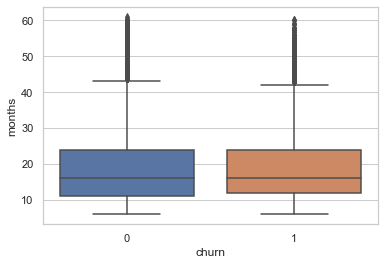

In [127]:
## Identificando e tratando outliers na variável

### Instalando pacotes necessários - retirar a # caso já o tenha instalado
### pip install seaborn

%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
sns.boxplot(x = "churn", y = "months", data = dataset4)

In [128]:
## Pré-processamento para exclusão de outliers

var1 = dataset4.loc[dataset4['churn'] == 0]
var1

,churn,actvsubs,adjmou,adjqty,adjrev,adults,area,asl_flag,attempt_Mean,avg3mou,...,mou_Mean,ovrmou_Mean,ovrrev_Mean,rev_Mean,roam_Mean,totcalls,totmou,totmrc_Mean,totrev,region
7,0,1,12439.00,4470,1423.06,2.0,DALLAS AREA,N,97.000000,633,...,682.500000,0.000000,0.000000,38.052500,0.0,4491,12492.000000,52.490,1427.71,South
9,0,2,976.00,377,1457.84,2.0,DALLAS AREA,N,6.666667,6,...,25.500000,0.000000,0.000000,31.662500,0.0,391,994.000000,29.990,1458.42,South
10,0,2,6620.11,2312,3195.01,5.0,DALLAS AREA,N,19.666667,90,...,97.500000,0.000000,0.000000,62.127500,0.0,2392,6868.110000,65.985,3290.73,South
11,0,3,5358.14,3087,2796.06,3.0,CENTRAL/SOUTH TEXAS AREA,N,9.000000,18,...,24.250000,0.000000,0.000000,35.295000,0.0,3207,5579.136667,34.980,3104.16,South
13,0,2,613.00,385,1323.62,1.0,CENTRAL/SOUTH TEXAS AREA,N,1.333333,3,...,2.500000,0.000000,0.000000,25.225000,0.0,400,642.000000,25.000,1370.94,South
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99973,0,1,2341.00,1074,438.02,2.0,SOUTHWEST AREA,N,62.333333,85,...,76.000000,0.000000,0.000000,0.000000,0.0,1093,2379.000000,29.670,446.66,South
99976,0,1,901.00,416,586.61,2.0,SOUTHWEST AREA,N,30.333333,84,...,63.333333,42.666667,14.933333,31.923333,0.0,417,902.000000,16.990,617.30,South
99980,0,1,7204.00,2496,1375.89,NaN,SOUTHWEST AREA,N,107.333333,338,...,492.000000,0.000000,0.000000,50.000000,0.0,2526,7248.000000,50.000,1417.30,South
99997,0,1,9234.00,1238,1055.93,1.0,SOUTHWEST AREA,N,0.000000,662,...,NaN,NaN,NaN,NaN,NaN,1271,9336.000000,NaN,1114.91,South


In [129]:
var2 = dataset4.loc[dataset4['churn'] == 1]
var2

,churn,actvsubs,adjmou,adjqty,adjrev,adults,area,asl_flag,attempt_Mean,avg3mou,...,mou_Mean,ovrmou_Mean,ovrrev_Mean,rev_Mean,roam_Mean,totcalls,totmou,totmrc_Mean,totrev,region
6,1,2,17371.03,6271,3065.24,3.0,DALLAS AREA,N,0.000000,0,...,0.000000,0.00,0.00,17.1450,0.0,6279,17390.03333,16.99,3091.70,South
20,1,1,78927.02,28359,6472.05,2.0,TENNESSEE AREA,N,760.333333,2314,...,1978.000000,362.25,72.45,172.4400,0.0,28477,79406.01667,99.99,6751.70,South
43,1,1,1317.00,304,968.28,5.0,DALLAS AREA,N,5.666667,5,...,3.750000,0.00,0.00,16.1400,0.0,318,1370.00000,16.99,968.88,South
45,1,1,35811.02,11110,3749.51,1.0,PHILADELPHIA AREA,N,176.333333,684,...,683.750000,3.00,0.75,57.9800,0.0,11193,35976.01667,54.98,3808.91,South
47,1,4,32612.00,14853,3127.38,6.0,CENTRAL/SOUTH TEXAS AREA,N,193.666667,920,...,851.500000,0.00,0.00,78.2875,0.0,14937,32772.00000,85.00,3187.88,South
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99962,1,2,9486.00,5983,1490.32,1.0,SOUTHWEST AREA,N,0.000000,485,...,NaN,NaN,NaN,NaN,NaN,6111,9722.00000,NaN,1559.16,South
99966,1,1,1990.00,1220,845.25,2.0,SOUTHWEST AREA,N,22.333333,43,...,43.333333,0.00,0.00,33.8900,3.9,1233,2009.00000,39.99,877.19,South
99968,1,1,7566.00,3653,1275.01,NaN,SOUTHWEST AREA,Y,0.000000,151,...,28.000000,0.00,0.00,33.6300,0.0,3737,7702.00000,29.99,1341.50,South
99978,1,2,21870.00,8511,2639.66,1.0,SOUTHWEST AREA,N,196.000000,504,...,NaN,NaN,NaN,NaN,NaN,9268,23709.00000,NaN,2875.90,South


In [132]:
## Retirando os outliers - variável 1

def get_iqr_values(var1, months):
    median = var1[months].median()
    q1 = var1[months].quantile(0.25) # 25th percentile / 1st quartile
    q3 = var1[months].quantile(0.75) # 7th percentile / 3rd quartile
    iqr = q3-q1 #Interquartile range
    minimum  = q1-1.5*iqr # The minimum value or the |- marker in the box plot
    maximum = q3+1.5*iqr # The maximum value or the -| marker in the box plot
    return median, q1, q3, iqr, minimum, maximum

def get_iqr_text(var1, months):
    median, q1, q3, iqr, minimum, maximum = get_iqr_values(var1, months)
    text = f"median={median:.2f}, q1={q1:.2f}, q3={q3:.2f}, iqr={iqr:.2f}, minimum={minimum:.2f}, maximum={maximum:.2f}"
    return text

def remove_outliers(var1, months):
    _, _, _, _, minimum, maximum = get_iqr_values(var1, months)
    df_out = var1.loc[(var1 [months] > minimum) & (var1[months] < maximum)]
    return df_out

def count_outliers(var1, months):
    _, _, _, _, minimum, maximum = get_iqr_values(var1, months)
    df_outliers = var1.loc[(var1[months] <= minimum) | (var1[months] >= maximum)]
    return df_outliers.shape[0]

print(f"rows before removing: {var1.shape[0]}")
var1 = remove_outliers(var1, 'months')
print(f"rows after removing: {var1.shape[0]}")

rows before removing: 22633
rows after removing: 22561


<AxesSubplot:ylabel='months'>

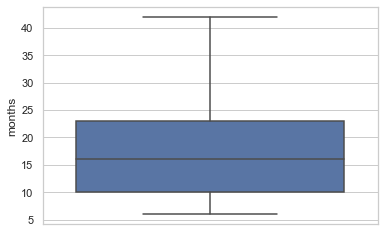

In [133]:
## No caso de ainda haver outliers repita a operação descrita na seção "Retirando os outliers"

sns.boxplot(y = "months", data = var1)

In [134]:
## Retirando os outliers - variável 2

def get_iqr_values(var2, months):
    median = var2[months].median()
    q1 = var2[months].quantile(0.25) # 25th percentile / 1st quartile
    q3 = var2[months].quantile(0.75) # 7th percentile / 3rd quartile
    iqr = q3-q1 #Interquartile range
    minimum  = q1-1.5*iqr # The minimum value or the |- marker in the box plot
    maximum = q3+1.5*iqr # The maximum value or the -| marker in the box plot
    return median, q1, q3, iqr, minimum, maximum

def get_iqr_text(var2, months):
    median, q1, q3, iqr, minimum, maximum = get_iqr_values(var2, months)
    text = f"median={median:.2f}, q1={q1:.2f}, q3={q3:.2f}, iqr={iqr:.2f}, minimum={minimum:.2f}, maximum={maximum:.2f}"
    return text

def remove_outliers(var2, months):
    _, _, _, _, minimum, maximum = get_iqr_values(var2, months)
    df_out = var2.loc[(var2 [months] > minimum) & (var2[months] < maximum)]
    return df_out

def count_outliers(var2, months):
    _, _, _, _, minimum, maximum = get_iqr_values(var2, months)
    df_outliers = var2.loc[(var2[months] <= minimum) | (var2[months] >= maximum)]
    return df_outliers.shape[0]

print(f"rows before removing: {var2.shape[0]}")
var2 = remove_outliers(var2, 'months')
print(f"rows after removing: {var2.shape[0]}")

rows before removing: 22515
rows after removing: 21881


<AxesSubplot:ylabel='months'>

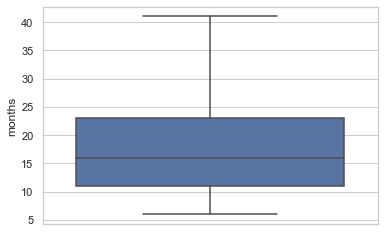

In [135]:
## No caso de ainda haver outliers repita a operação descrita na seção "Retirando os outliers"

sns.boxplot(y = "months", data = var2)

In [136]:
## Testando a normalidade da variável
    ## Distribuição normal - Teste-T
    ## Distribuição não-normal - Teste Mann-Whitnney 

from scipy import stats

In [137]:
data = var1['months']
shapiro_test = stats.shapiro(data)
shapiro_test

C:\Users\Gui\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9334215521812439, pvalue=0.0)

In [138]:
data = var2['months']
shapiro_test = stats.shapiro(data)
shapiro_test

## Nesse estudo os valores dos testes de normalidade foram um pouco anômalos. É necessário uma investigação mais profunda.
## Mas os histogramas conseguem dar uma boa ideia de como as variáveis são distribuídas.

ShapiroResult(statistic=0.9335303902626038, pvalue=0.0)

<AxesSubplot:>

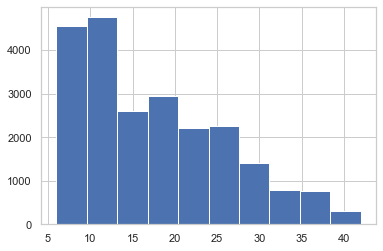

In [139]:
var1['months'].hist()

<AxesSubplot:>

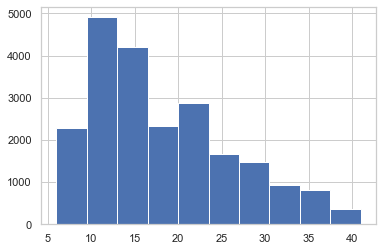

In [140]:
var2['months'].hist()

In [141]:
## Teste não paramétrico de independência entre amostras

from scipy.stats import mannwhitneyu
U1, p = mannwhitneyu(var1['months'], var2['months'])
print(U1,p)

## Embora o teste Mann-Whitnney tenha sido significativo, não há como afirmar
### que as amostras apresentam médias diferentes. Os gráficos feitos
### com os dados fornecidos refutam essa ideia. É necessário uma investigação
### mais detalhada para entender o que houve.

235003604.0 1.0280466683175768e-18


In [142]:
## Mesclando os dataframes gerados para a limpeza de outliers

dataset5 = pd.merge(var1, var2, how = 'outer')
dataset5.head()

,churn,actvsubs,adjmou,adjqty,adjrev,adults,area,asl_flag,attempt_Mean,avg3mou,...,mou_Mean,ovrmou_Mean,ovrrev_Mean,rev_Mean,roam_Mean,totcalls,totmou,totmrc_Mean,totrev,region
0,0,3,39590.02,21775,4111.73,3.0,SOUTHWEST AREA,N,274.000000,1106,...,1166.25,0.0,0.00,82.5950,1.4625,22025,40010.04,75.00,4249.91,South
1,0,1,193.00,91,745.81,5.0,DALLAS AREA,N,0.000000,0,...,0.00,0.0,0.00,17.1450,0.0000,98,205.00,16.99,798.07,South
2,0,1,6001.03,2452,2379.33,3.0,PHILADELPHIA AREA,N,98.666667,213,...,265.75,0.0,0.00,52.9600,8.7200,2521,6116.03,44.99,2472.89,South
3,0,1,29672.07,11792,2850.64,1.0,ATLANTIC SOUTH AREA,N,252.000000,766,...,831.75,83.0,12.45,75.9675,0.0000,12151,30491.07,50.00,2965.78,South
4,0,1,15393.00,7995,2502.53,2.0,CENTRAL/SOUTH TEXAS AREA,N,160.333333,515,...,473.75,0.0,0.00,50.6875,0.0000,8048,15471.00,69.99,2591.44,South


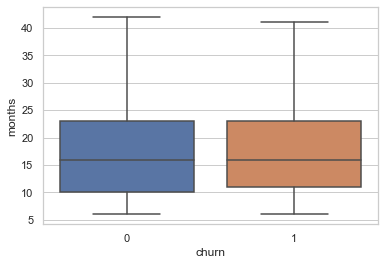

In [143]:
sns.boxplot(x = "churn", y = "months", data = dataset5);

In [144]:
## Salvando o arquivo
dataset5.to_csv('churns_by_month.csv', index = False);

In [145]:
# Hipótese 3 - Existe correlação entre a mudança de utilização do serviço e o valor pago por ele,
# e isso afeta o número de "churns"
## Uma boa relação custo-benefício é dada quando pagamos um valor condizente com o serviço que estamos utilizando
## como clientes. Se esse balanço não é mais atrativo, o cliente pode cancelar a conta e procurar outro serviço
## que ofereça vantagens e benefícios condizentes com o valor que ele quer pagar.
## O objetivo do raciocínio a seguir é avaliar se há correlação entre as variáveis de mudança na utilização do serviço
## e nos valores pagos pelo cliente, e associar essa correlação a clientes e ex-clientes

# Filtrando o dataset para performar análises locais
dataset4 = dataset2.loc[dataset2['region'] == 'South']
dataset4.head()

## Deletando valores nulos - retirar o # caso haja valores nulos nas colunas de interesse
dataset6 = dataset4.dropna(subset=['change_mou'], axis=0, how='any')
dataset7 = dataset6.dropna(subset=['change_rev'], axis=0, how='any')
dataset7.isnull().sum()

churn                0
actvsubs             0
adjmou               0
adjqty               0
adjrev               0
adults           10578
area                 0
asl_flag             0
attempt_Mean         0
avg3mou              0
avg3qty              0
avg3rev              0
avg6mou           1402
avg6qty           1402
avg6rev           1402
avgmou               0
avgqty               0
avgrev               0
ccrndmou_Mean        0
change_mou           0
change_rev           0
complete_Mean        0
custcare_Mean        0
eqpdays              1
months               0
mou_Mean             0
ovrmou_Mean          0
ovrrev_Mean          0
rev_Mean             0
roam_Mean            0
totcalls             0
totmou               0
totmrc_Mean          0
totrev               0
region               0
dtype: int64

In [122]:
dataset7.head()

,churn,actvsubs,adjmou,adjqty,adjrev,adults,area,asl_flag,attempt_Mean,avg3mou,...,mou_Mean,ovrmou_Mean,ovrrev_Mean,rev_Mean,roam_Mean,totcalls,totmou,totmrc_Mean,totrev,region
6,1,2,17371.03,6271,3065.24,3.0,DALLAS AREA,N,0.000000,0,...,0.00,0.0,0.0,17.1450,0.0,6279,17390.033330,16.990,3091.70,South
7,0,1,12439.00,4470,1423.06,2.0,DALLAS AREA,N,97.000000,633,...,682.50,0.0,0.0,38.0525,0.0,4491,12492.000000,52.490,1427.71,South
9,0,2,976.00,377,1457.84,2.0,DALLAS AREA,N,6.666667,6,...,25.50,0.0,0.0,31.6625,0.0,391,994.000000,29.990,1458.42,South
10,0,2,6620.11,2312,3195.01,5.0,DALLAS AREA,N,19.666667,90,...,97.50,0.0,0.0,62.1275,0.0,2392,6868.110000,65.985,3290.73,South
11,0,3,5358.14,3087,2796.06,3.0,CENTRAL/SOUTH TEXAS AREA,N,9.000000,18,...,24.25,0.0,0.0,35.2950,0.0,3207,5579.136667,34.980,3104.16,South


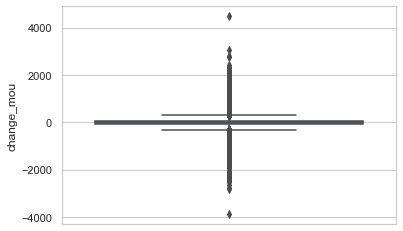

In [123]:
## Identificando e tratando outliers na variável

### Instalando pacotes necessários - retirar a # caso já o tenha instalado
### pip install seaborn

%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
sns.boxplot(y = "change_mou", data = dataset7);

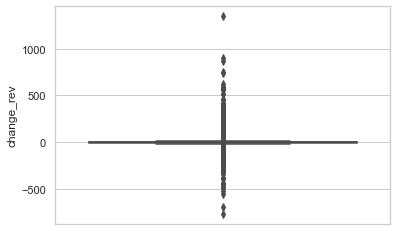

In [124]:
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
sns.boxplot(y = "change_rev", data = dataset7);

In [96]:
## Retirando os outliers - variável 1

def get_iqr_values(dataset7, change_mou):
    median = dataset7[change_mou].median()
    q1 = dataset7[change_mou].quantile(0.25) # 25th percentile / 1st quartile
    q3 = dataset7[change_mou].quantile(0.75) # 7th percentile / 3rd quartile
    iqr = q3-q1 #Interquartile range
    minimum  = q1-1.5*iqr # The minimum value or the |- marker in the box plot
    maximum = q3+1.5*iqr # The maximum value or the -| marker in the box plot
    return median, q1, q3, iqr, minimum, maximum

def get_iqr_text(dataset7, change_mou):
    median, q1, q3, iqr, minimum, maximum = get_iqr_values(dataset7, change_mou)
    text = f"median={median:.2f}, q1={q1:.2f}, q3={q3:.2f}, iqr={iqr:.2f}, minimum={minimum:.2f}, maximum={maximum:.2f}"
    return text

def remove_outliers(dataset7, change_mou):
    _, _, _, _, minimum, maximum = get_iqr_values(dataset7, change_mou)
    df_out = dataset7.loc[(dataset7 [change_mou] > minimum) & (dataset7[change_mou] < maximum)]
    return df_out

def count_outliers(dataset7, change_mou):
    _, _, _, _, minimum, maximum = get_iqr_values(dataset7, change_mou)
    df_outliers = dataset7.loc[(dataset7[change_mou] <= minimum) | (dataset7[change_mou] >= maximum)]
    return df_outliers.shape[0]

print(f"rows before removing: {dataset7.shape[0]}")
dataset7 = remove_outliers(dataset7, 'change_mou')
print(f"rows after removing: {dataset7.shape[0]}");

rows before removing: 34908
rows after removing: 34873


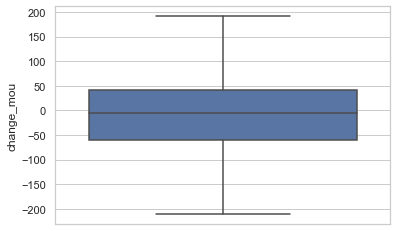

In [97]:
## No caso de ainda haver outliers repita a operação descrita na seção "Retirando os outliers"

sns.boxplot(y = "change_mou", data = dataset7);

In [112]:
## Retirando os outliers - variável 2

def get_iqr_values(dataset7, change_rev):
    median = dataset7[change_rev].median()
    q1 = dataset7[change_rev].quantile(0.25) # 25th percentile / 1st quartile
    q3 = dataset7[change_rev].quantile(0.75) # 7th percentile / 3rd quartile
    iqr = q3-q1 #Interquartile range
    minimum  = q1-1.5*iqr # The minimum value or the |- marker in the box plot
    maximum = q3+1.5*iqr # The maximum value or the -| marker in the box plot
    return median, q1, q3, iqr, minimum, maximum

def get_iqr_text(dataset7, change_rev):
    median, q1, q3, iqr, minimum, maximum = get_iqr_values(dataset7, change_rev)
    text = f"median={median:.2f}, q1={q1:.2f}, q3={q3:.2f}, iqr={iqr:.2f}, minimum={minimum:.2f}, maximum={maximum:.2f}"
    return text

def remove_outliers(dataset7, change_rev):
    _, _, _, _, minimum, maximum = get_iqr_values(dataset7, change_rev)
    df_out = dataset7.loc[(dataset7 [change_rev] > minimum) & (dataset7[change_rev] < maximum)]
    return df_out

def count_outliers(dataset7, change_rev):
    _, _, _, _, minimum, maximum = get_iqr_values(dataset7, change_rev)
    df_outliers = dataset7.loc[(dataset7[change_rev] <= minimum) | (dataset7[change_rev] >= maximum)]
    return df_outliers.shape[0]

print(f"rows before removing: {dataset7.shape[0]}")
dataset7 = remove_outliers(dataset7, 'change_rev')
print(f"rows after removing: {dataset7.shape[0]}");

rows before removing: 11149
rows after removing: 10431


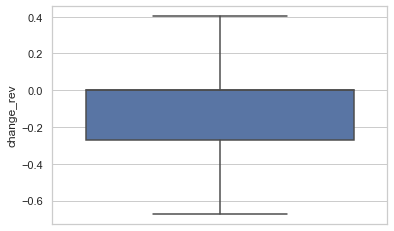

In [113]:
## No caso de ainda haver outliers repita a operação descrita na seção "Retirando os outliers"

sns.boxplot(y = "change_rev", data = dataset7);

In [192]:
## Salvando o arquivo
dataset7.to_csv('change_mou_x_change_rev.csv', index = False);

In [115]:
## Testando a normalidade das variáveis
    ## Distribuição normal - Correlação de Pearson
    ## Distribuição não-normal - Correlação de Spearman 

from scipy import stats
data=dataset7['change_mou']
shapiro_test = stats.shapiro(data)
shapiro_test

C:\Users\Gui\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9602859616279602, pvalue=0.0)

In [116]:
data=dataset7['change_rev']
shapiro_test = stats.shapiro(data)
shapiro_test

ShapiroResult(statistic=0.8949371576309204, pvalue=0.0)

<AxesSubplot:>

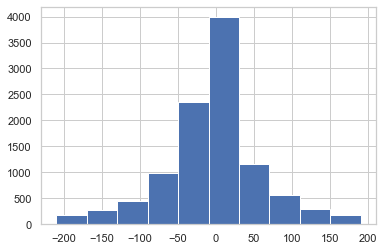

In [117]:
dataset7['change_mou'].hist()

<AxesSubplot:>

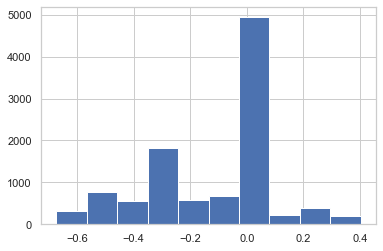

In [118]:
dataset7['change_rev'].hist()

In [119]:
import matplotlib.pyplot as plt
import numpy as np

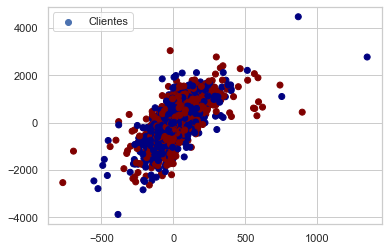

In [191]:
plt.scatter(
    x=dataset7['change_rev'],
    y=dataset7['change_mou'],
    c=dataset7['churn'],cmap="jet")
plt.legend(["Clientes", "Ex-clientes"])
plt.show()

## A correlação entre a mudança na utilização do serviço e no seu valor comparado a três meses anteriores existe,
## e parece ser bastante significativa. Porém, isso não se reflete no comportamento de manutenção de clientes.